# Movie lens 100k Data Set - Data Analysis and Processing
**This data set contains:**
* 100,000 ratings (1-5) from 943 users on 1682 movies. 
* Each user has rated at least 20 movies. 
* Simple demographic info for the users (age, gender, occupation, zip)

**Context:**
* Collected through the MovieLens web site (movielens.umn.edu) during the seven-month period from September 19th, 1997 through April 22nd, 1998.

## Files
**u.data**
* The full u data set, 100000 ratings by 943 users on 1682 items.
* Each user has rated at least 20 movies.  
* Users and items are numbered consecutively from 1.
* The data is randomly ordered.
* user id | item id | rating | timestamp.

**u.item**
* Information about the items (movies).
* movie id | movie title | release date | video release date |
    IMDb URL | unknown | Action | Adventure | Animation |
    Children's | Comedy | Crime | Documentary | Drama | Fantasy |
    Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |
    thriller | War | Western |
* The last 19 fields are the genres, a 1 indicates the movie is of that genre, a 0 indicates it is not; movies can be in several genres at once. The movie ids are the ones used in the u.data data set.

**u.genre**
* Numbered list of genres.

**u.user** 
* Demographic information about the users
              separated list of
              user id | age | gender | occupation | zip code
              The user ids are the ones used in the u.data data set.

There are also pre-split 5-fold validation (u1/u2/u3/u4/u5) sets and a disjoint set of testing data (ua / ub).

## Data Analysis

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

### Read in data

In [4]:
rating_df= pd.read_csv("u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

item_df = pd.read_csv("u.item", sep="|",encoding="latin-1", 
                      names=["movie_id", "movie_title", "release_date", "video_release_date",
                             "imbd_url", "unknown", "action", "adventure", "animation",
                             "childrens", "comedy", "crime", "documentary", "drama", "fantasy", 
                             "film_noir", "horror", "musical", "mystery", "romance", 
                             "sci-fi", "thriller", "war", "western"])

user_df = pd.read_csv("u.user", sep="|", encoding="latin-1", names=["user_id", "age", "gender",
                                                                            "occupation", "zip_code"])

In [11]:
print("Ratings Matrix")
print(rating_df.head(), '\n')

print('Movie Data')
print(item_df[["movie_id", "movie_title"]].head(), '\n')

print('User Data')
print(user_df.head())


Ratings Matrix
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596 

Movie Data
   movie_id        movie_title
0         1   Toy Story (1995)
1         2   GoldenEye (1995)
2         3  Four Rooms (1995)
3         4  Get Shorty (1995)
4         5     Copycat (1995) 

User Data
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


### Summary Statistics
* Number of movies / users.
* Summary statistics of movie each genre, release dates
* Summary statistics for user age, gender, occupation

In [35]:
# Number of movies
print("This dataset surveys:", len(item_df), "movies.")

This dataset surveys: 1682 movies.


In [38]:
# Number of each genre
num_genres = item_df[["unknown", "action", "adventure", "animation",
                             "childrens", "comedy", "crime", "documentary", "drama", "fantasy", 
                             "film_noir", "horror", "musical", "mystery", "romance", 
                             "sci-fi", "thriller", "war", "western"]].sum()

print(num_genres)

unknown          2
action         251
adventure      135
animation       42
childrens      122
comedy         505
crime          109
documentary     50
drama          725
fantasy         22
film_noir       24
horror          92
musical         56
mystery         61
romance        247
sci-fi         101
thriller       251
war             71
western         27
dtype: int64


c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Elizabeth\anaconda3\envs\data-processing\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

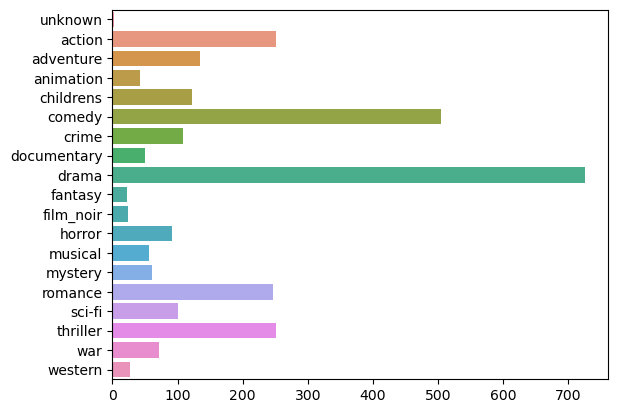

In [39]:
sns.barplot(y=num_genres.index, x=num_genres, orient='h')

In [42]:
# Top-3 genres
print("The top three genres are: ", end='')
num_genres.nlargest(3)

The top three genres are: 

drama     725
comedy    505
action    251
dtype: int64

### Cross-Connection Analysis
* Top-k rated movies: overall, genre, time period, gender, occupation.
* Least-k rated movies
* Average user rating: gender, number of reviews, genre, occupation, age
* Consider graphs